In [1]:
import warnings
warnings.filterwarnings('ignore')

# Введение 
▎О наборе данных

Обзор:
Этот набор данных включает информацию для оценки уровней ожирения у людей из стран Мексики, Перу и Колумбии, основанную на их пищевых привычках и физическом состоянии. Данные содержат 17 атрибутов и 2111 записей, которые помечены классом NObesity (Уровень ожирения), что позволяет классифицировать данные по значениям: Нехватка веса, Нормальный вес, Избыточный вес I уровня, Избыточный вес II уровня, Ожирение I типа, Ожирение II типа и Ожирение III типа.

Детали данных:

• Пол: Пол

• Возраст: Возраст

• Рост: в метрах

• Вес: в килограммах

• Семейная история: Есть ли у кого-то из членов семьи проблемы с избыточным весом?

• FAVC: Часто ли вы едите высококалорийную пищу?

• FCVC: Обычно ли вы едите овощи в своих приемах пищи?

• NCP: Сколько основных приемов пищи у вас в день?

• CAEC: Едите ли вы что-либо между приемами пищи?

• Курение: Курите ли вы?

• CH2O: Сколько воды вы пьете ежедневно?

• SCC: Следите ли вы за калориями, которые едите ежедневно?

• FAF: Как часто вы занимаетесь физической активностью?

• TUE: Сколько времени вы проводите с технологическими устройствами, такими как мобильный телефон, видеоигры, телевизор, компьютер и другие?

• CALC: Как часто вы употребляете алкоголь?

• MTRANS: Какой транспорт вы обычно используете?

• Уровень ожирения (Целевая колонка): Уровень ожирения

#Обработка данных 
Загрузка днных

In [2]:
import pandas
data = pandas.read_csv('Obesity prediction.csv')
data.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Описание численых признаков

In [3]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


как мы видим возраст и NCP имеет выбросы


<Axes: ylabel='NCP'>

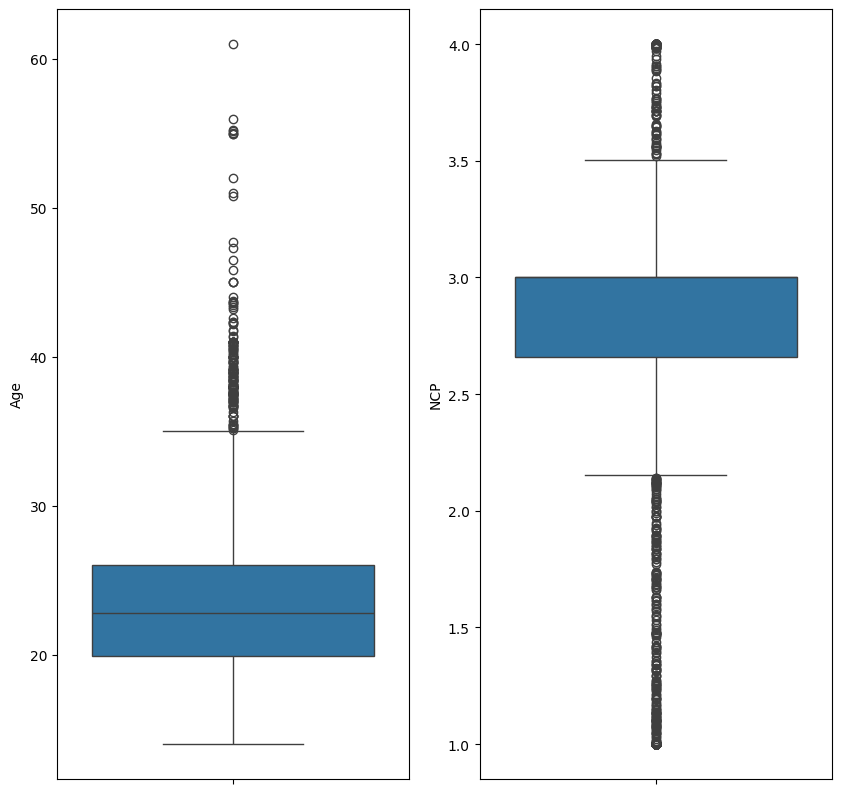

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
sns.boxplot(data['Age'])

plt.subplot(1,2,2)
sns.boxplot(data['NCP'])

я предполагаю что выбросы идет речь о возрасте человека и кол-во его приемов пищи, аномалии не вижу т.к. приемов мище может быть разное кол-во вплоть до 4-х , а до 60 лет люди спокойно доживают


# Проверка на пропуски

In [5]:
data.isna().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

## Првоерям корреляцию признаков

In [6]:
# Разделимд данные на числовые и категориальные переменые 
numerical = data.select_dtypes(include=['int64','float64']).columns.tolist()

categorial = data.select_dtypes(include='object').columns.tolist()
categorial.remove('Obesity')

print(f' Numerical list : {numerical}')
print(f' Categorial list : {categorial}')


 Numerical list : ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
 Categorial list : ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


<Axes: >

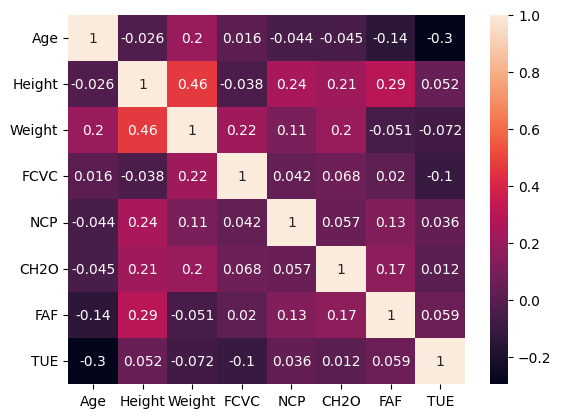

In [7]:
sns.heatmap(data[numerical].corr(), annot=True, fmt='.2g')

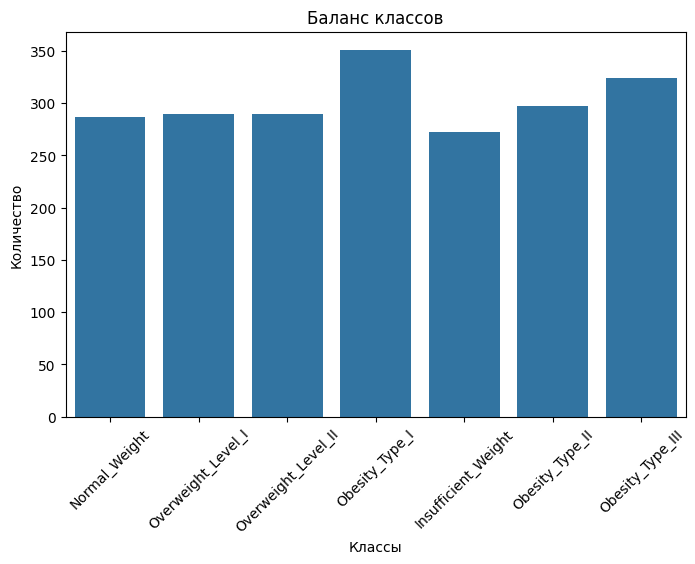

In [8]:

# Визуализация с помощью Seaborn
plt.figure(figsize=(8, 5))
sns.countplot(x='Obesity', data=data)
plt.title('Баланс классов')
plt.xlabel('Классы')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()


## Предобработка перед обучением


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

label = LabelEncoder()
y = label.fit_transform(data['Obesity'])

X = data.drop('Obesity', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size= 0.15)
print(f'Shape X train : {X_train.shape}')
print(f'Shape y train : {y_train.shape}')
print(f'Shape X test : {X_test.shape}')
print(f'Shape y test : {y_test.shape}')


Shape X train : (1794, 16)
Shape y train : (1794,)
Shape X test : (317, 16)
Shape y test : (317,)


Кодирвоание и скалирование признаков

In [10]:
from sklearn.compose import ColumnTransformer
preprocessoring = ColumnTransformer(transformers=[
    ('num', StandardScaler(),numerical),
    ('cat', OneHotEncoder(),categorial)
])

Обучение модели

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier

model = Pipeline([
    ('Preprocesing', preprocessoring),
    ('Classifier', RandomForestClassifier())
])
model.fit(X_train,y_train)

Pipeline(steps=[('Preprocesing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'family_history',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('Classifier', RandomForestClassifier())])

In [12]:
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import f1_score

print(f"""F-мера равно: {f1_score(y_test,
                                  model.predict(X_test), average='macro'):.3f}""" )


F-мера равно: 0.931


In [14]:
import joblib

joblib.dump(model, 'model.pkl')

['model.pkl']

In [15]:
model.named_steps.Classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Подберем параметры

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'Classifier__n_estimators': [50, 100, 200],  # Количество деревьев в лесу

    

    'Classifier__min_samples_split': [2, 5, 10],  # Минимальное количество образцов для разделения узла

    'Classifier__min_samples_leaf': [1, 2, 4],     # Минимальное количество образцов в листовом узле

    'Classifier__max_features': ['sqrt', 'log2'],   # Количество признаков для поиска наилучшего разбиения

    'Classifier__bootstrap': [True, False],         # Использовать бутстрэп при построении деревьев

    'Classifier__criterion': ['gini', 'entropy'],   # Критерий для измерения качества разбиения
    
}

from sklearn.model_selection import PredefinedSplit

test_fold = [0 if x in X_train.index else -1 for x in X.index]
ps = PredefinedSplit(test_fold)

search = GridSearchCV(model, param_grid, cv=ps)

search.fit(X, y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=nan):
{'Classifier__bootstrap': True, 'Classifier__criterion': 'gini', 'Classifier__max_features': 'sqrt', 'Classifier__min_samples_leaf': 1, 'Classifier__min_samples_split': 2, 'Classifier__n_estimators': 50}


In [17]:
joblib.dump(search, 'best_model.pkl')

['best_model.pkl']